In [35]:
from __future__ import print_function
import cv2
import numpy as np
from skimage.metrics import structural_similarity
import matplotlib.pyplot as plt
from cv2 import cv2 as cv2
from PIL import Image
import imagehash
from moviepy.editor import VideoFileClip


In [456]:
videoCapture = cv2.VideoCapture('C:/Users/11488/Desktop/zju/taobao_test1.mp4')

In [457]:
up=0
down=0
new_scene=[]

In [458]:
fps = videoCapture.get(cv2.CAP_PROP_FPS)

In [459]:
fps

30.0

In [460]:
success, img1= videoCapture.read()

In [461]:
success

True

In [472]:
i = 0
while i<25:
    success, img2 = videoCapture.read()
    i+=1

In [473]:
img2.shape

(480, 272, 3)

In [38]:
orb = cv2.ORB_create(5000)

In [39]:
img1 = img1[80:440,:]
img2= img2[80:440,:]
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [40]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

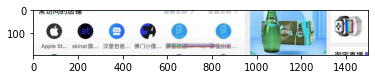

In [41]:
match = bf.match(des1,des2)
match = sorted(match, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,match[:20],None,flags=2)
cv2.imwrite('test3.jpg',img3)
plt.imshow(img3)
plt.show()

In [42]:
matches = bf.knnMatch(des1, trainDescriptors = des2, k = 2)

In [43]:
good = [m for (m,n) in matches if m.distance < 0.35*n.distance]
len(good)


153

In [44]:
gap_factor=5 ## num of detection within each second
match_ratio=0.3 ##the distance ratio thershold between best match and second match
good_match_rate=0.7 ##the rate of matches to be chosen in all
ransacReprojThreshold=6
min_match_count=5
def _AlignImages(img1,img2):
    # initiate ORB detector
    orb = cv2.ORB_create(5000)
    
    ##check bilateral banner, eliminate stick part
#     up_idx,down_idx=_SplitImage(img1,img2)
#     img1 = img1[up_idx:down_idx,:]
#     img2= img2[up_dx:down_idx,:]
    img1 = img1[80:440,:]
    img2 = img2[80:440,:]
    
    ##find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None)
    
    ##match with Brute-Force
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    ##find best 2 matches for each kp
    matches = bf.knnMatch(des1, trainDescriptors = des2, k = 2)
    ##ratio test
    good = [m for (m,n) in matches if m.distance < match_ratio*n.distance]
    ##sort and choose the best part of matches
#     good = sorted(good, key = lambda x:x.distance)
#     good = good[:int(len(good) * good_match_rate)]

    
    if len(good)>min_match_count:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        ##find (3x3) transform matrix
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,ransacReprojThreshold)
        print(M)

In [45]:
_AlignImages(img2,img1)

[[ 9.90389773e-01 -1.70207499e-02  5.52298735e+02]
 [-7.92088372e-04  9.95430976e-01  1.97871990e-01]
 [-1.01322632e-05 -2.59167141e-05  1.00000000e+00]]


In [46]:
for i in match[:1]:
   
    print(kp1[i.queryIdx].pt)
    print(kp2[i.trainIdx].pt)
   

(637.2000122070312, 156.0)
(85.20000457763672, 156.0)


In [47]:
(a-b).shape

NameError: name 'a' is not defined

In [48]:
(a-b).sum(axis=0)[0]

NameError: name 'a' is not defined

In [49]:
[int(len(a)/2)]

NameError: name 'a' is not defined

In [50]:
kp1[6].pt

(496.0, 58.0)

In [51]:
import copy

In [52]:
keyp_without_size = copy.copy(img1)
keyp_with_size = copy.copy(img1)

In [53]:
cv2.drawKeypoints(img1, kp1, keyp_without_size, color = (0, 255, 0))

array([[[250, 255, 251],
        [250, 255, 251],
        [250, 255, 251],
        ...,
        [250, 254, 255],
        [250, 253, 255],
        [250, 254, 255]],

       [[250, 255, 251],
        [250, 255, 251],
        [250, 255, 251],
        ...,
        [250, 253, 255],
        [250, 253, 255],
        [250, 253, 255]],

       [[250, 255, 251],
        [250, 255, 251],
        [250, 255, 251],
        ...,
        [250, 253, 255],
        [250, 253, 255],
        [250, 253, 255]],

       ...,

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]]

In [54]:
cv2.drawKeypoints(img1, kp1, keyp_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

array([[[250, 255, 251],
        [250, 255, 251],
        [250, 255, 251],
        ...,
        [250, 254, 255],
        [250, 253, 255],
        [250, 254, 255]],

       [[250, 255, 251],
        [250, 255, 251],
        [250, 255, 251],
        ...,
        [250, 253, 255],
        [250, 253, 255],
        [250, 253, 255]],

       [[250, 255, 251],
        [250, 255, 251],
        [250, 255, 251],
        ...,
        [250, 253, 255],
        [250, 253, 255],
        [250, 253, 255]],

       ...,

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]]

True

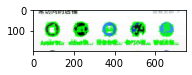

In [55]:
cv2.imwrite('test1.jpg',keyp_without_size)
plt.subplot(121)
# keyp_without_size = cv2.resize(keyp_without_size,None,fx=4,fy=4)
# plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)
cv2.imwrite('test2.jpg',keyp_with_size)
# # Display the image with the keypoints with size and orientation
# plt.subplot(122)
# plt.title('Keypoints With Size and Orientation')
# plt.imshow(keyp_with_size)
# plt.show()


In [56]:
up=0
down=0
left=0
right=0

In [69]:
img1.shape

(1334, 750, 3)

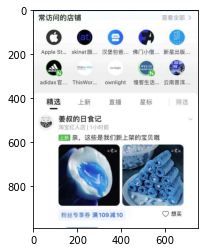

In [79]:
plt.imshow(img1)

In [85]:
gap_factor=5 ## num of detection within each second
match_ratio=0.3 ##the distance ratio thershold between best match and second match
good_match_rate=0.7 ##the rate of matches to be chosen in all
ransacReprojThreshold=5
min_match_count=5
def _AlignImages(img1,img2):
    # initiate ORB detector
    orb = cv2.ORB_create(5000)
    
    ##check bilateral banner, eliminate stick part
#     up_idx,down_idx=_SplitImage(img1,img2)
#     img1 = img1[up_idx:down_idx,:]
#     img2= img2[up_dx:down_idx,:]
    img1 = img1[210:1200,]
    img2 = img2[210:1200,]
    
    ##find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None)
    
    ##match with Brute-Force
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    ##find best 2 matches for each kp
    matches = bf.knnMatch(des1, trainDescriptors = des2, k = 2)
    ##ratio test
    good = [m for (m,n) in matches if m.distance < match_ratio*n.distance]
    ##sort and choose the best part of matches
#     good = sorted(good, key = lambda x:x.distance)
#     good = good[:int(len(good) * good_match_rate)]
    
    if len(good)>min_match_count:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        ##find (3x3) transform matrix
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,ransacReprojThreshold)
        print(M)
        t_x = M[0][2]
        t_y = M[1][2]
        print(t_x,t_y)
        _Pattern(t_x,t_y)
        
        
        
def _Pattern(t_x,t_y):
    if abs(t_x)<1 and abs(t_y)<1:
        print('stop')
        return 
    elif abs(t_x/t_y)>20:
        print('left,right')
        if (t_x>0):
            print('right')
        else:
            print('left')
        return
    elif abs(t_y/t_x)>20:
#         print('up,down')
        if (t_y>0):
            print('down')
        else:
            print('up')
        return 
        
    

In [94]:
import os
img1=cv2.imread(os.path.abspath(os.curdir)+'/6.jpg')
img2=cv2.imread(os.path.abspath(os.curdir)+'/5.jpg')


In [95]:
# plt.imshow(img1)


In [96]:
# plt.imshow(img2)

In [97]:
_AlignImages(img1,img2)

[[ 1.00217009e+00 -5.75643484e-04  3.39896640e+02]
 [ 3.24311048e-03  9.98550301e-01  2.86053372e-02]
 [ 5.39027348e-06 -2.26625554e-06  1.00000000e+00]]
339.8966401944644 0.028605337243081088
left,right
right


In [ ]:
orb = cv2.ORB_create(5000)

In [ ]:
img1 = img1[80:440,:]
img2= img2[80:440,:]
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)